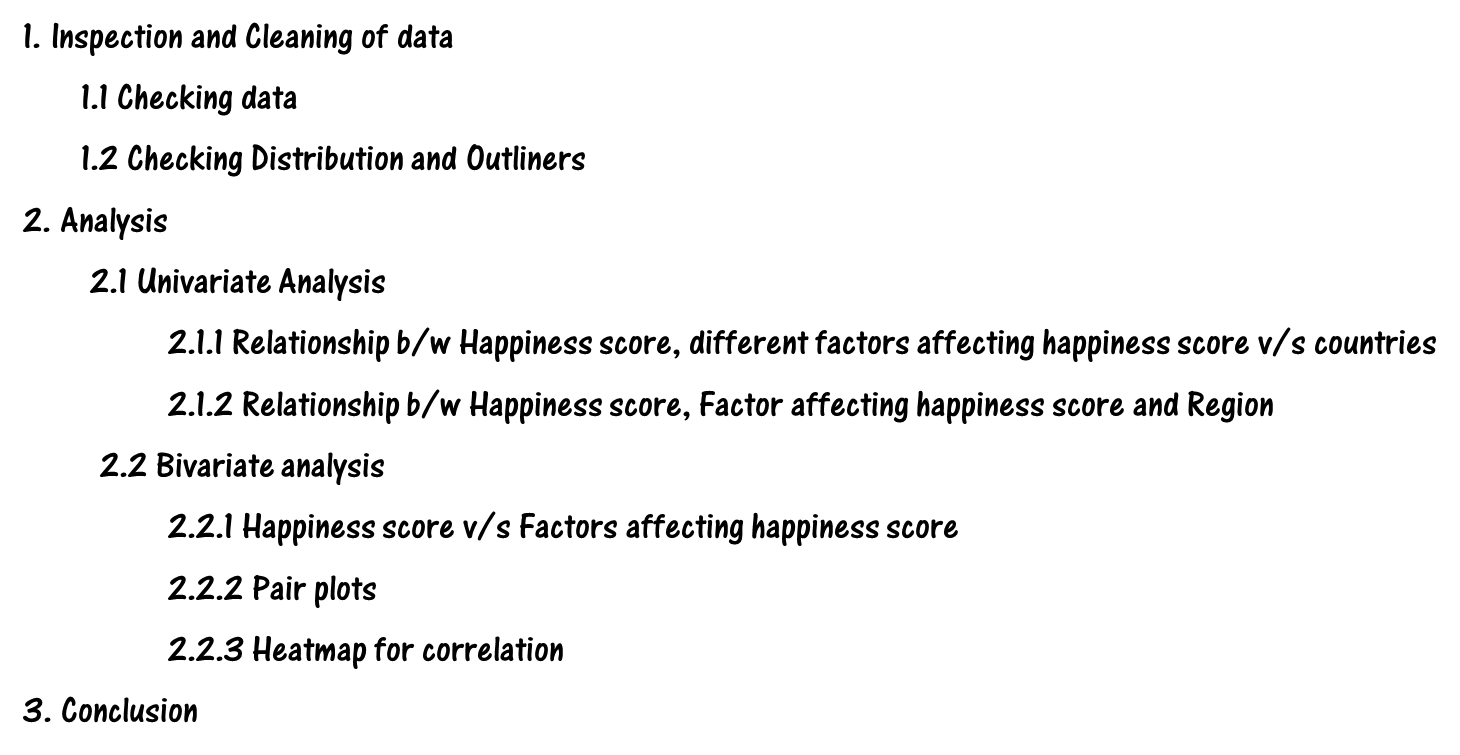

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
Data_2022 = pd.read_csv('Happiness report.csv')

# 1. Inspecting and Cleaning Data

**1.1 Checking data**

In [3]:
# Shape of dataset

Data_2022.shape

(146, 13)

In [4]:
# getting info about data

Data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Continent                                   146 non-null    object 
 3   Happiness score                             146 non-null    float64
 4   Whisker-high                                146 non-null    float64
 5   Whisker-low                                 146 non-null    float64
 6   Dystopia (1.83) + residual                  146 non-null    float64
 7   Explained by: GDP per capita                146 non-null    float64
 8   Explained by: Social support                146 non-null    float64
 9   Explained by: Healthy life expectancy       146 non-null    float64
 10  Explained by: 

In [5]:
# Checking the data

Data_2022.head(5)

,RANK,Country,Continent,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,Europe,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,Europe,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,Europe,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,Europe,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,Europe,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [6]:
# Checking for Missing values values

missing = pd.DataFrame(Data_2022.isnull().sum()/len(Data_2022.index))

missing.columns = ['Percentage of Missing Values']

missing

,Percentage of Missing Values
RANK,0.0
Country,0.0
Continent,0.0
Happiness score,0.0
Whisker-high,0.0
Whisker-low,0.0
Dystopia (1.83) + residual,0.0
Explained by: GDP per capita,0.0
Explained by: Social support,0.0
Explained by: Healthy life expectancy,0.0


In [7]:
# Checking number of unique values

Data_2022.nunique()

RANK                                          146
Country                                       146
Continent                                       6
Happiness score                               141
Whisker-high                                  144
Whisker-low                                   141
Dystopia (1.83) + residual                    138
Explained by: GDP per capita                  141
Explained by: Social support                  133
Explained by: Healthy life expectancy         134
Explained by: Freedom to make life choices    128
Explained by: Generosity                      116
Explained by: Perceptions of corruption       116
dtype: int64

In [8]:
# checking Duplicates 

Data_2022.duplicated().value_counts()

False    146
dtype: int64

**1.2 Checking Distribution and Outliners**

In [9]:
def distribution(i):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.distplot(Data_2022[i])
    plt.axvline(Data_2022[i].mean(), color = 'r')
    plt.axvline(Data_2022[i].median(), color = 'black')
    plt.subplot(1,2,2)
    sns.boxplot(Data_2022[i])

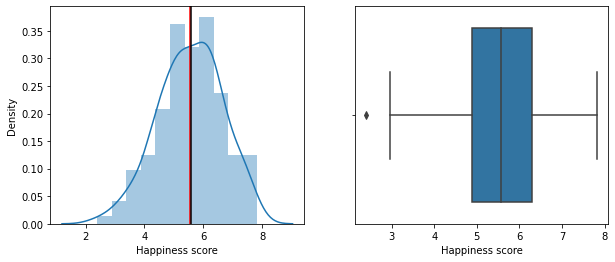

In [10]:
distribution('Happiness score')

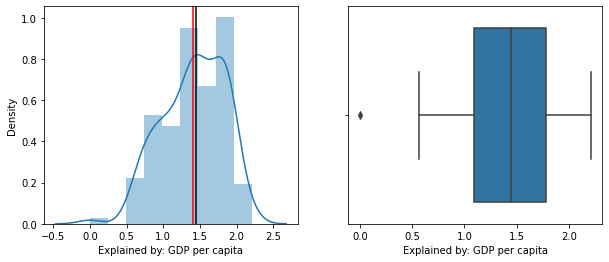

In [11]:
distribution('Explained by: GDP per capita')

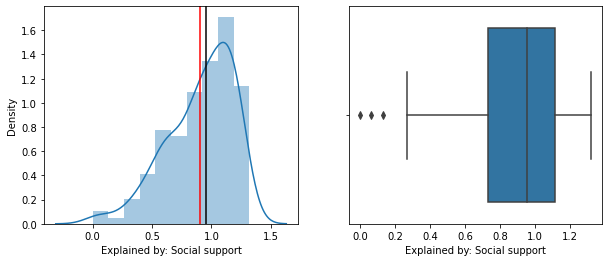

In [12]:
distribution('Explained by: Social support')

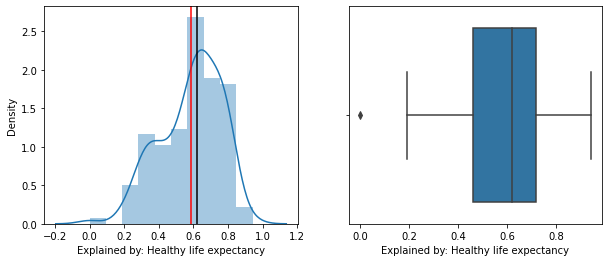

In [13]:
distribution('Explained by: Healthy life expectancy')

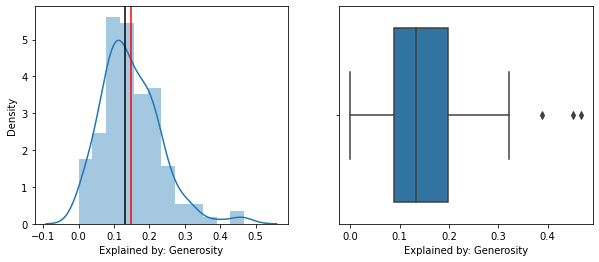

In [14]:
distribution('Explained by: Generosity')

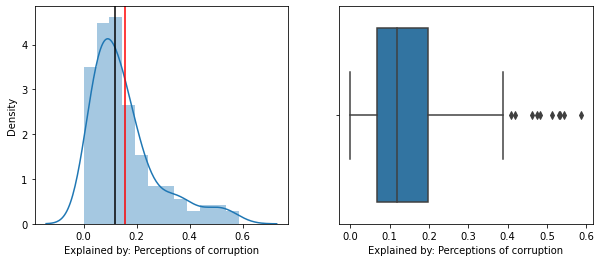

In [15]:
distribution('Explained by: Perceptions of corruption')

**What can we make from the data set till now**

1. There are 146 rows and 13 columns in this dataset'
2. There is no null value present
3. There is no Duplicate values Present in this data
4. Finland Ranks 1 and Afghanistan Ranks Last in this Dataset
5. It looks like that mean is almost equal to median, so we can say that this data is almost normally distributed
6. There are only few outliners which are having a very less effect on the mean so we can use mean for our analysis

In [16]:
# Descriptive Statistics

Data_2022.describe()

,RANK,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,73.500000,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,42.290661,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,1.000000,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.250000,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,73.500000,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,109.750000,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,146.000000,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


# 2. Analysis

# 2.1 Univariate analysis

**2.1.1 Relationship b/w Happiness score, different factors affecting happiness score v/s countries**

In [17]:
def top_10_and_bottom_10(i):
    top_10 = Data_2022.sort_values(by = [i], ascending = False).head(10)
    bottom_10 = Data_2022.sort_values(by = [i], ascending = True).head(10)

In [18]:
def bar(i):
    plt.figure(figsize = (9,5))
    plt.subplot(1, 2, 1)
    plt.title('Top10')
    TOP_10 = Data_2022.sort_values(by = [i], ascending = False).head(10)
    plt.bar(TOP_10['Country'], TOP_10[i], color = 'green')
    plt.xticks(rotation = 90)
    plt.xlabel('Countries')
    plt.ylabel(i)

def bar1(i):

    plt.subplot(1, 2, 2)
    plt.title('Last10')
    Bottom_10 = Data_2022.sort_values(by = [i], ascending = True).head(10)
    plt.bar(Bottom_10['Country'], Bottom_10[i], color = 'red')
    plt.xticks(rotation = 90)
    plt.xlabel('Countries')
    plt.ylabel(i)
    
    plt.tight_layout()

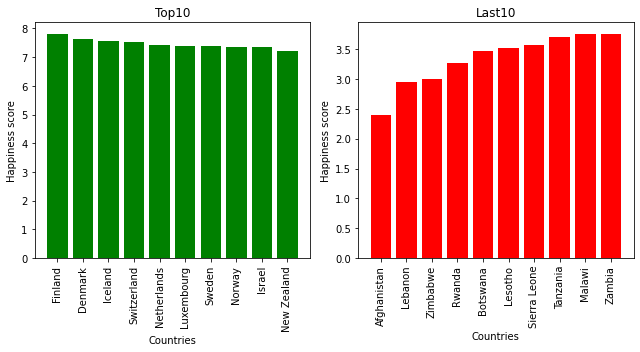

In [19]:
bar('Happiness score')

bar1('Happiness score')

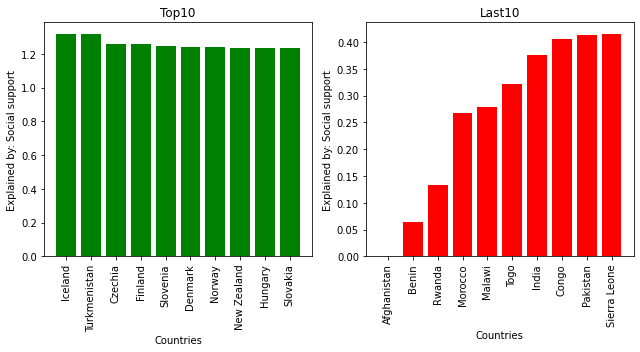

In [20]:
bar('Explained by: Social support')

bar1('Explained by: Social support')

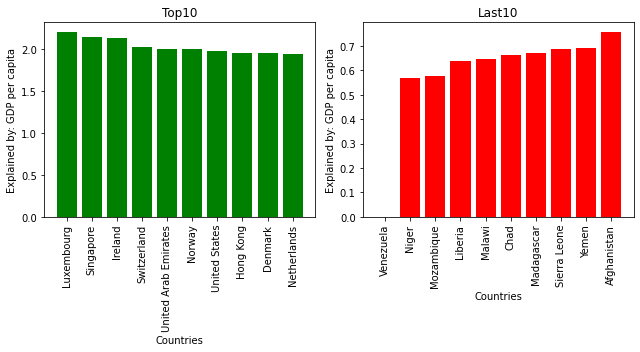

In [21]:
bar('Explained by: GDP per capita')

bar1('Explained by: GDP per capita')

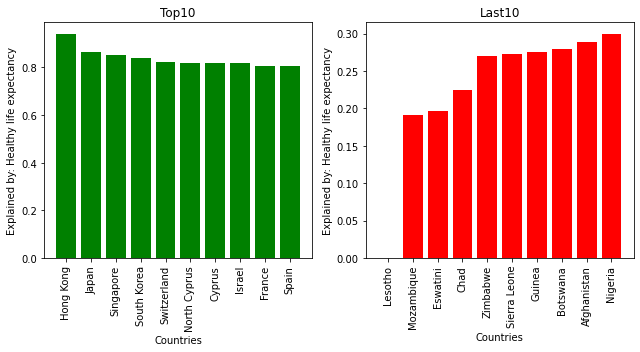

In [22]:
bar('Explained by: Healthy life expectancy')

bar1('Explained by: Healthy life expectancy')

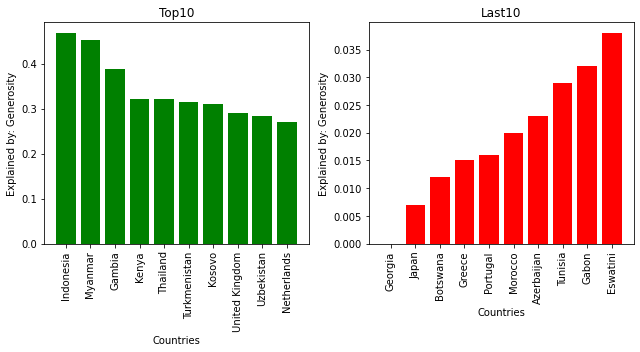

In [23]:
bar('Explained by: Generosity')

bar1('Explained by: Generosity')

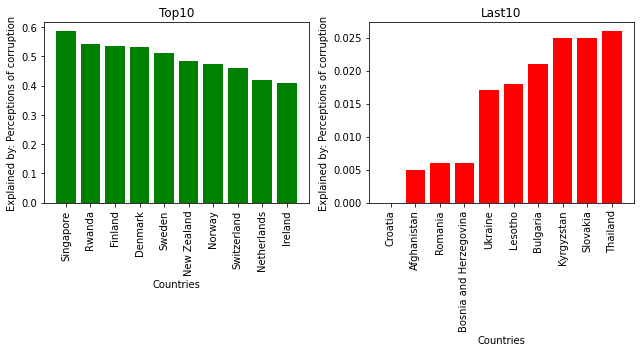

In [24]:
bar('Explained by: Perceptions of corruption')

bar1('Explained by: Perceptions of corruption')

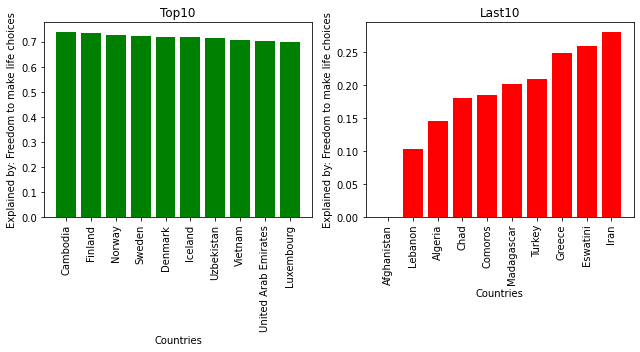

In [25]:
bar('Explained by: Freedom to make life choices')

bar1('Explained by: Freedom to make life choices')

**What we can say till now**

There are 6 factors which determine the Happiness score they are: Social support, GDP, Healthy life expectancy, Freedom to speech, Generosity and absence of corruption

Finland is the Happiest country in the world. It has GDP less then many countries but it has Good social support, Freedom to make choices and absence of corruption

Afghanistan Ranks last in the World happiness index. It ranks last in terms of Freedom to speech & Social support, 2nd last in terms of Absence of corruption also it has poor GDP and Healthy life expectancy

Cambodia Ranks 1 in terms of Freedom to make choices where as Afgahnistan ranks last

Singapore ranks 1 in terms of Preception of Corruption where as Croatia ranks last

Afghanistan ranks 1 in terms of Generosity where as Georgia ranks last

Hong Kong ranks 1 in terms of Healthy life expectancy where as Lesotho ranks Last

Icelank ranks 1 in terms of Social support where as afghanistan ranks last

Luxembourg ranks 1 in terms of GDP per capita where as Venezuela ranks last

**2.1.2 Relation ship b/w Happiness score, Factor affecting happiness score and Region**

<BarContainer object of 6 artists>

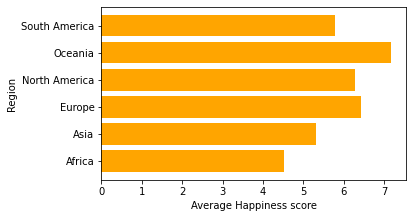

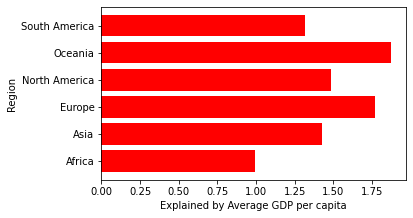

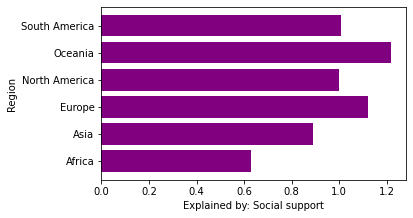

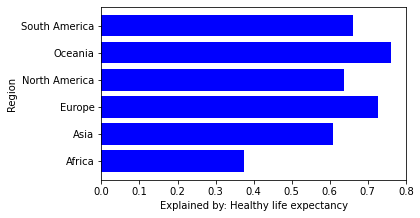

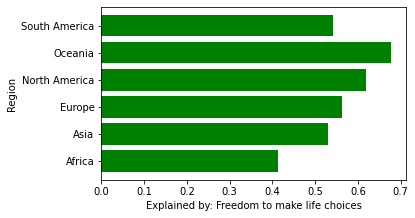

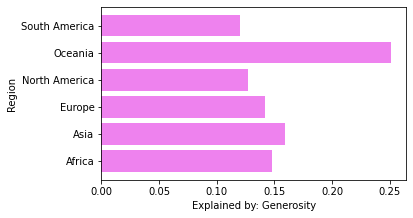

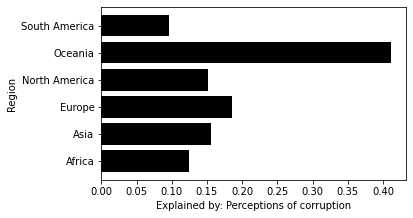

In [26]:
grouped_data = Data_2022.groupby('Continent').mean()

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Average Happiness score')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Happiness score'], color = 'orange')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by Average GDP per capita')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: GDP per capita'], color = 'red')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by: Social support')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: Social support'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by: Healthy life expectancy')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: Healthy life expectancy'], color = 'blue')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by: Freedom to make life choices')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: Freedom to make life choices'], color = 'green')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by: Generosity')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: Generosity'], color = 'violet')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.xlabel('Explained by: Perceptions of corruption')
plt.ylabel('Region')
plt.barh(grouped_data.index, grouped_data['Explained by: Perceptions of corruption'], color = 'black')


** What we can say till now ** 

The average Happiness score, Preception of corruption, Healthy life expectancy, Social support, GDP per capita of Europe and oceanic countries (Australia and Newzeland) is more then rest of the world

Northern America and Oceanic countries like (Australia and Newzeland) has more freedom of choice then rest of the world

Asia and Oceanic countries like (Australia and Newzeland) has Generosity more then rest of the world

In [27]:
Data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Continent                                   146 non-null    object 
 3   Happiness score                             146 non-null    float64
 4   Whisker-high                                146 non-null    float64
 5   Whisker-low                                 146 non-null    float64
 6   Dystopia (1.83) + residual                  146 non-null    float64
 7   Explained by: GDP per capita                146 non-null    float64
 8   Explained by: Social support                146 non-null    float64
 9   Explained by: Healthy life expectancy       146 non-null    float64
 10  Explained by: 

# 2.2 Bivariate Analysis

**2.2.1 Happiness score v/s Factors affecting happiness score**

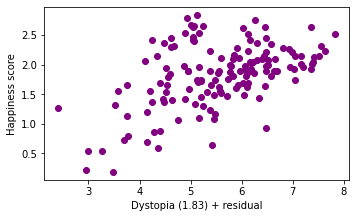

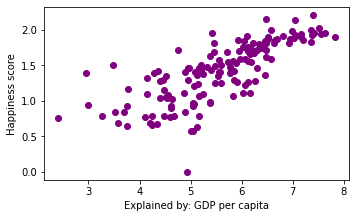

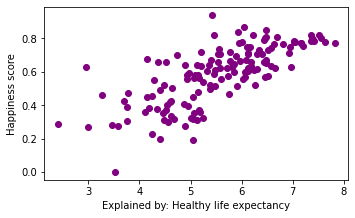

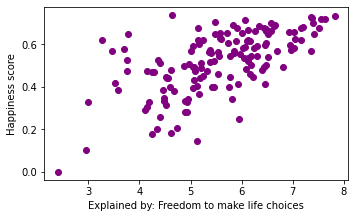

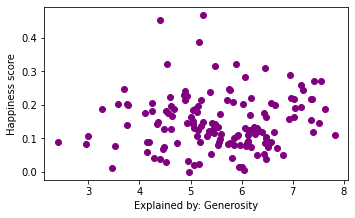

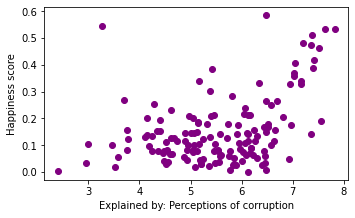

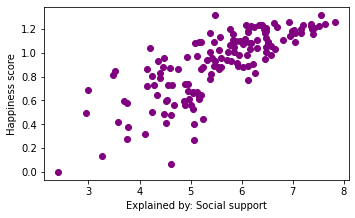

In [28]:
plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Dystopia (1.83) + residual')
plt.scatter(Data_2022['Happiness score'], Data_2022['Dystopia (1.83) + residual'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: GDP per capita')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: GDP per capita'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Healthy life expectancy')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: Healthy life expectancy'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Freedom to make life choices')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: Freedom to make life choices'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Generosity')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: Generosity'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Perceptions of corruption')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: Perceptions of corruption'], color = 'purple')

plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
plt.ylabel('Happiness score')
plt.xlabel('Explained by: Social support')
plt.scatter(Data_2022['Happiness score'], Data_2022['Explained by: Social support'], color = 'purple')

**2.2.2 Pair plots**

<Figure size 72000x72000 with 0 Axes>

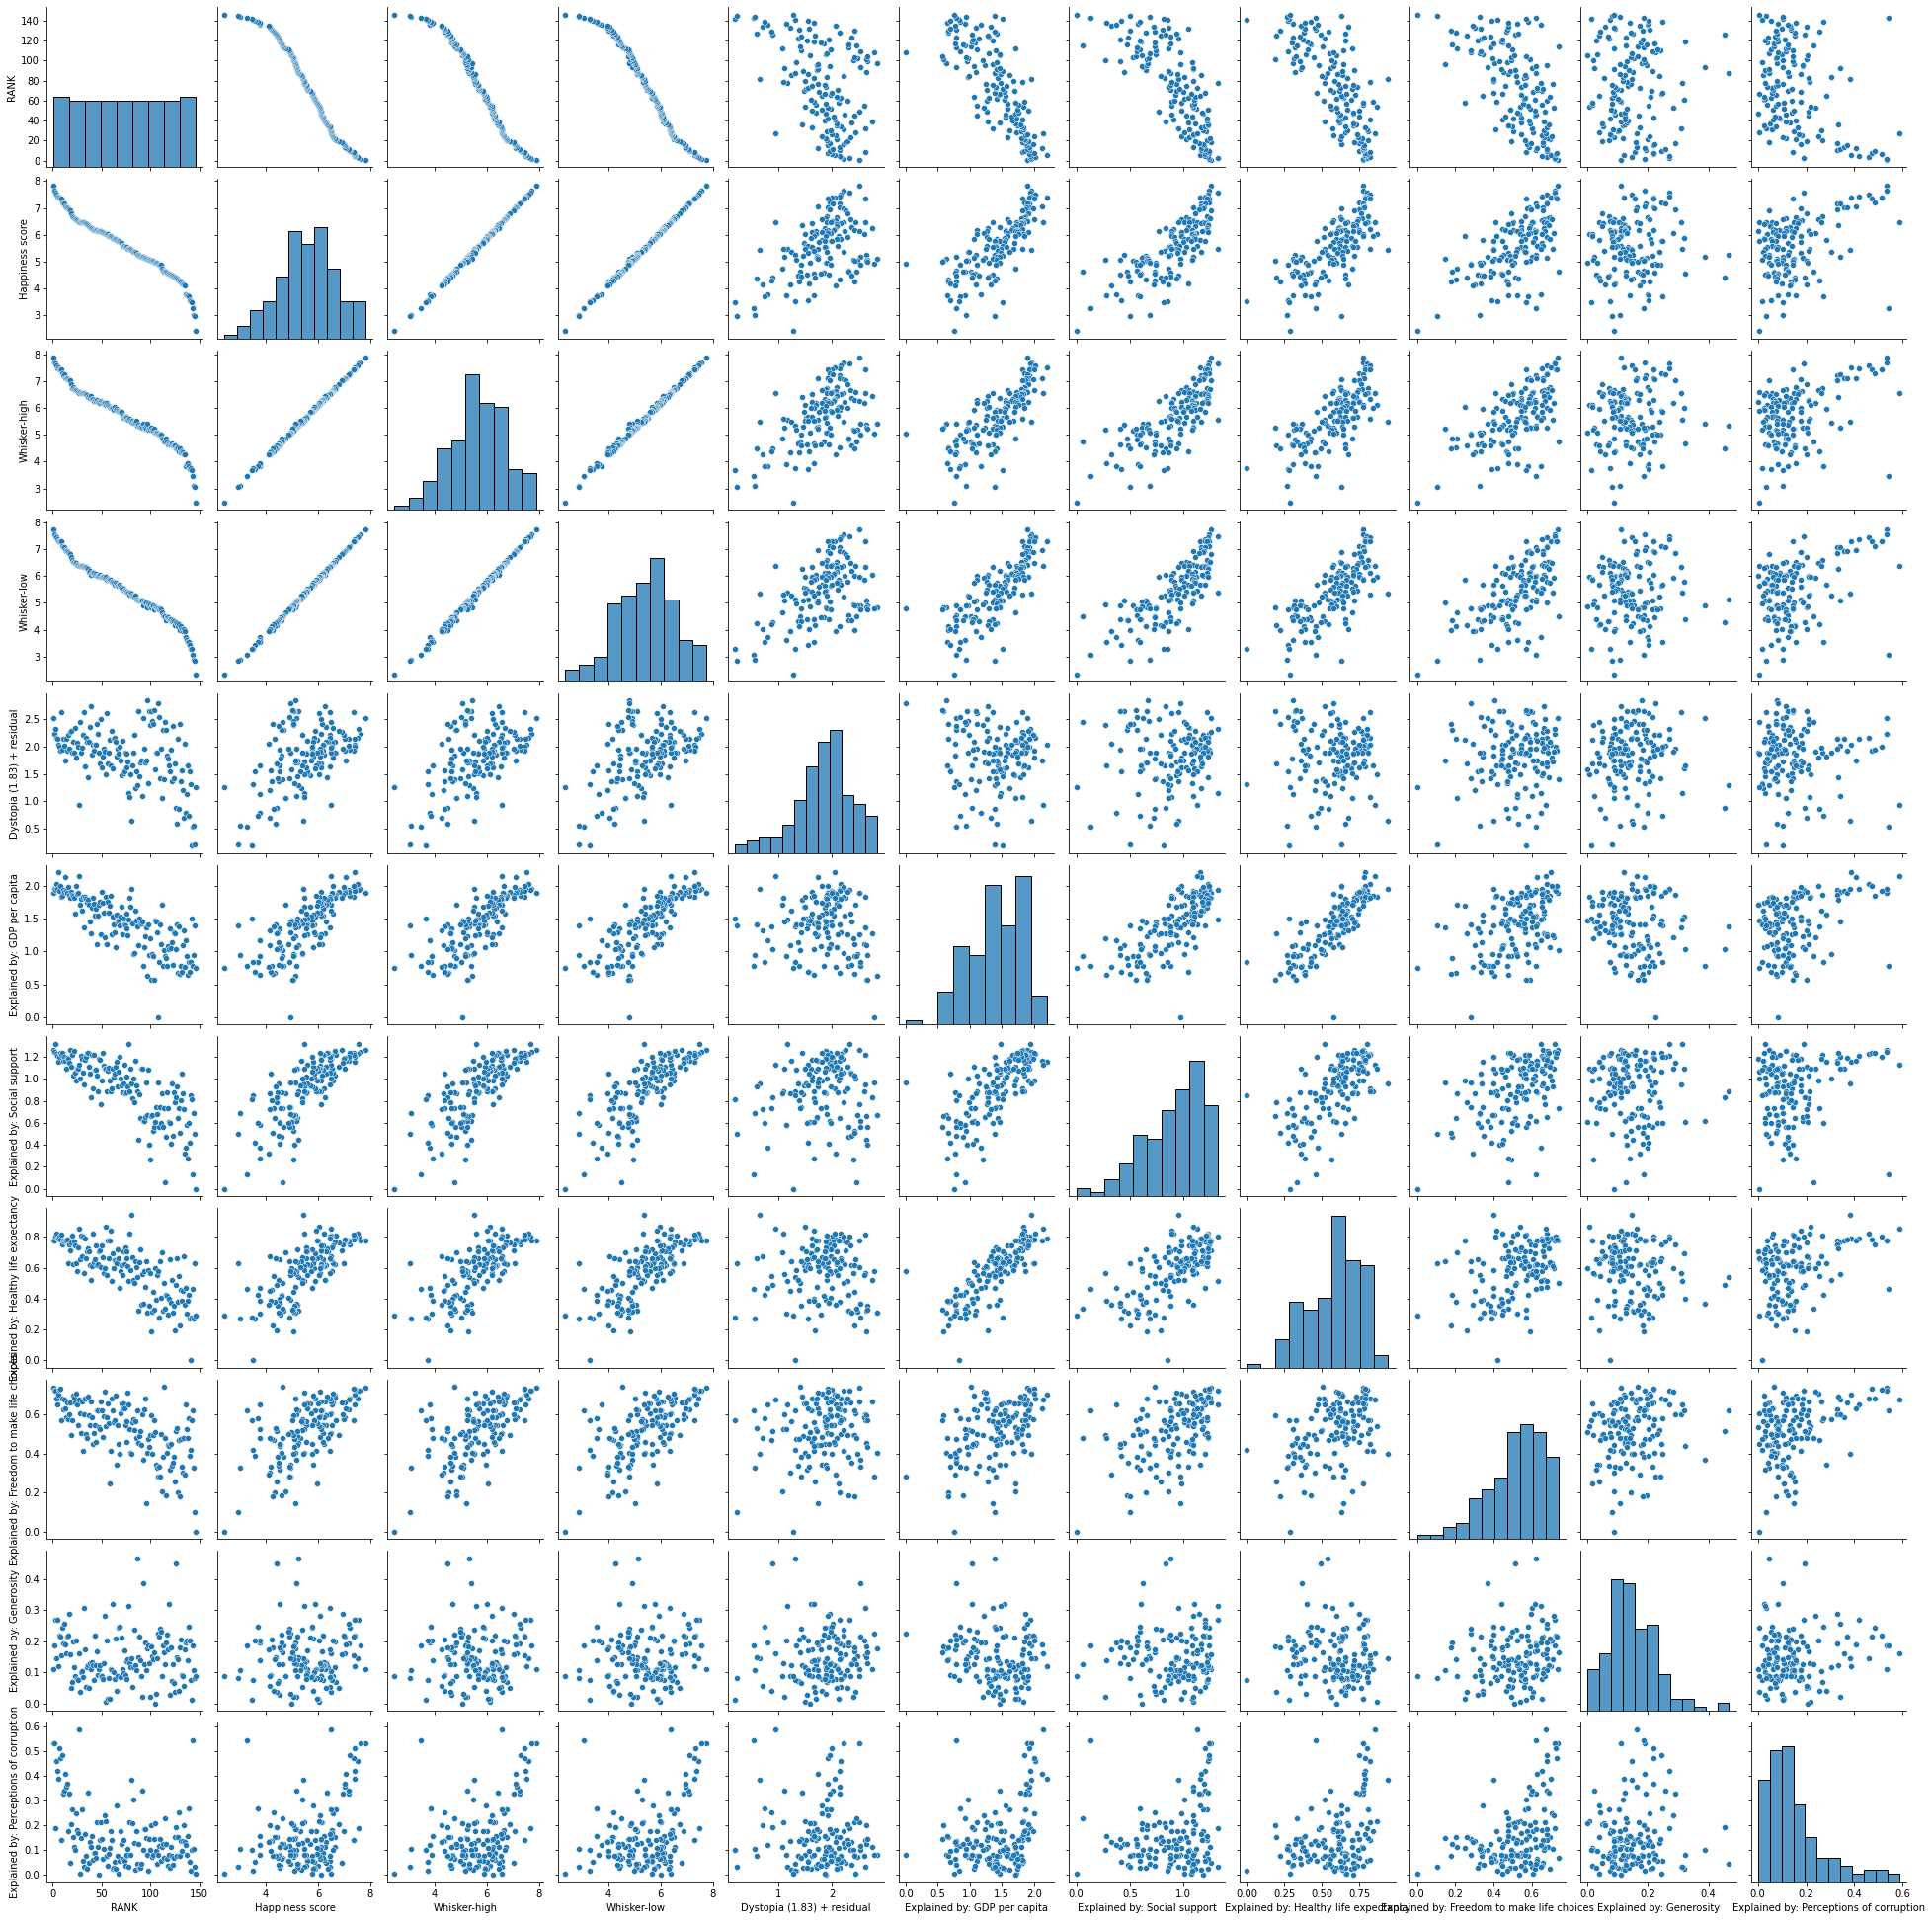

In [29]:
plt.figure(figsize = (1000,1000))

sns.pairplot(Data_2022)

**2.2.3 Heatplot for correlation**

<AxesSubplot:>

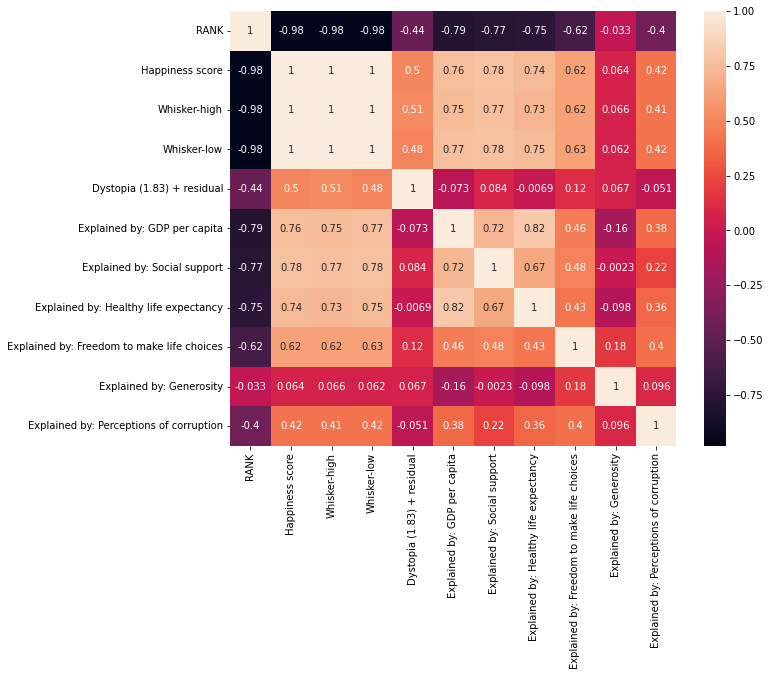

In [30]:
# Correlation

plt.figure(figsize = (10,8))

corr = Data_2022.corr()

sns.heatmap(corr, annot = True)

**What we can say till now**

Out of all the Factors GDP, Freedom to make choices, Social Support, Life Expectancy and Perception of Corruption are the once that contribute most to the happiness score

Rank increases when GDP Decreases but there are some exceptions same is the case with Health Expectancy, Freedom to make choices and Social Support but Generosity and Perception of corruption is on the lower side for majority of the Countries

Healthy life expectancy Increases with social support, GDP per capita

# 3. Conclusion

**From the above analysis we can conclude that:**

There are 6 factors which determine the Happiness score they are: Social support, GDP, Healthy life expectancy, Freedom to speech, Generosity and absence of corruption

Finland is the Happiest country in the world. It has GDP less then many countries but it has Good social support, Freedom to make choices and absence of corruption

Afghanistan Ranks last in the World happiness index. It ranks last in terms of Freedom to speech & Social support, 2nd last in terms of Absence of corruption also it has poor GDP and Healthy life expectancy

Cambodia Ranks 1 in terms of Freedom to make choices where as Afgahnistan ranks last

Singapore ranks 1 in terms of Preception of Corruption where as Croatia ranks last

Afghanistan ranks 1 in terms of Generosity where as Georgia ranks last

Hong Kong ranks 1 in terms of Healthy life expectancy where as Lesotho ranks Last

Icelank ranks 1 in terms of Social support where as afghanistan ranks last

Luxembourg ranks 1 in terms of GDP per capita where as Venezuela ranks last

The average Happiness score, Preception of corruption, Healthy life expectancy, Social support, GDP per capita of Europe and oceanic countries (Australia and Newzeland) is more then rest of the world

Northern America and Oceanic countries like (Australia and Newzeland) has more freedom of choice then rest of the world

Asia and Oceanic countries like (Australia and Newzeland) has Generosity more then rest of the world

Out of all the Factors GDP, Freedom to make choices, Social Support, Life Expectancy and Perception of Corruption are the once that contribute most to the happiness score

Rank increases when GDP Decreases but there are some exceptions same is the case with Health Expectancy, Freedom to make choices and Social Support but Generosity and Perception of corruption is on the lower side for majority of the Countries

Healthy life expectancy Increases with social support, GDP per capita